# Emepezaré con los cuerpos estáticos que son más predecibles

In [ ]:
# Cargar dataset lake
lake_file_path = '/workspace/series-temporales/data/raw/Lake_Bilancino.csv'
data = pd.read_csv(lake_file_path)

# Primera filas
data.head()


,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [21]:
# Convertir formato fechas
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

# Verificar valores nulos
missing_values = data.isnull().sum()

# Resumen de nulos
missing_values



Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [22]:
# Interpolar valores
data_interpolated = data.interpolate(method='time')

# Verificar valores
missing_values_after_interpolation = data_interpolated.isnull().sum()

# Resumen
missing_values_after_interpolation


Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                 0
dtype: int64

In [23]:
# método de forward fill para rellenar los valores 
data_filled = data_interpolated.fillna(method='ffill')

# Verificar valores
missing_values_after_ffill = data_filled.isnull().sum()

# Resumen final 
missing_values_after_ffill


/tmp/ipykernel_2109/2426260503.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data_interpolated.fillna(method='ffill')


Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                 0
dtype: int64

### Columnas con datos insuficientes

In [24]:
# Probamos con la media
data_filled_statistical = data_filled.fillna(data_filled.mean())

# Verificar valores
missing_values_after_statistical = data_filled_statistical.isnull().sum()

# Resumen de valores
missing_values_after_statistical


Rainfall_S_Piero        0
Rainfall_Mangona        0
Rainfall_S_Agata        0
Rainfall_Cavallina      0
Rainfall_Le_Croci       0
Temperature_Le_Croci    0
Lake_Level              0
Flow_Rate               0
dtype: int64

# EDA DEL LAGO

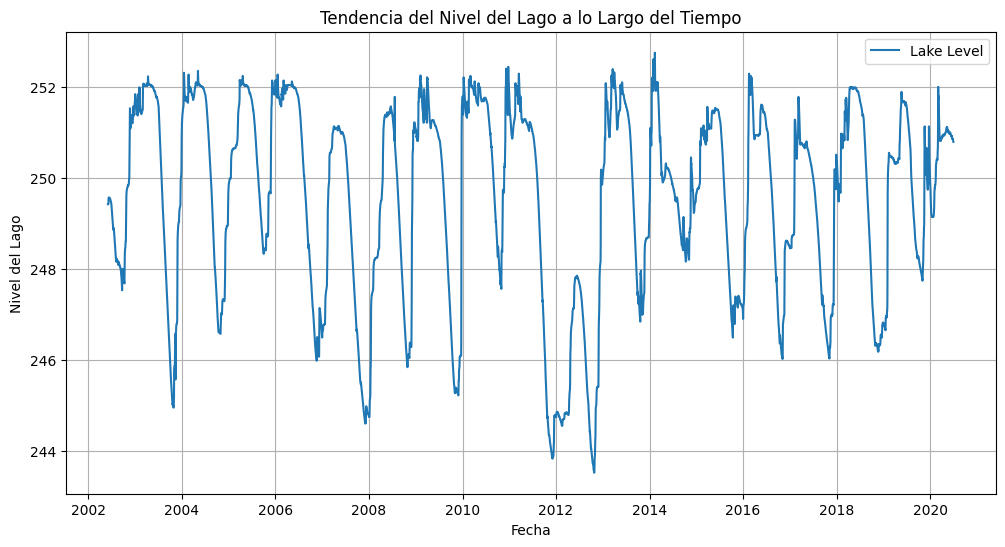

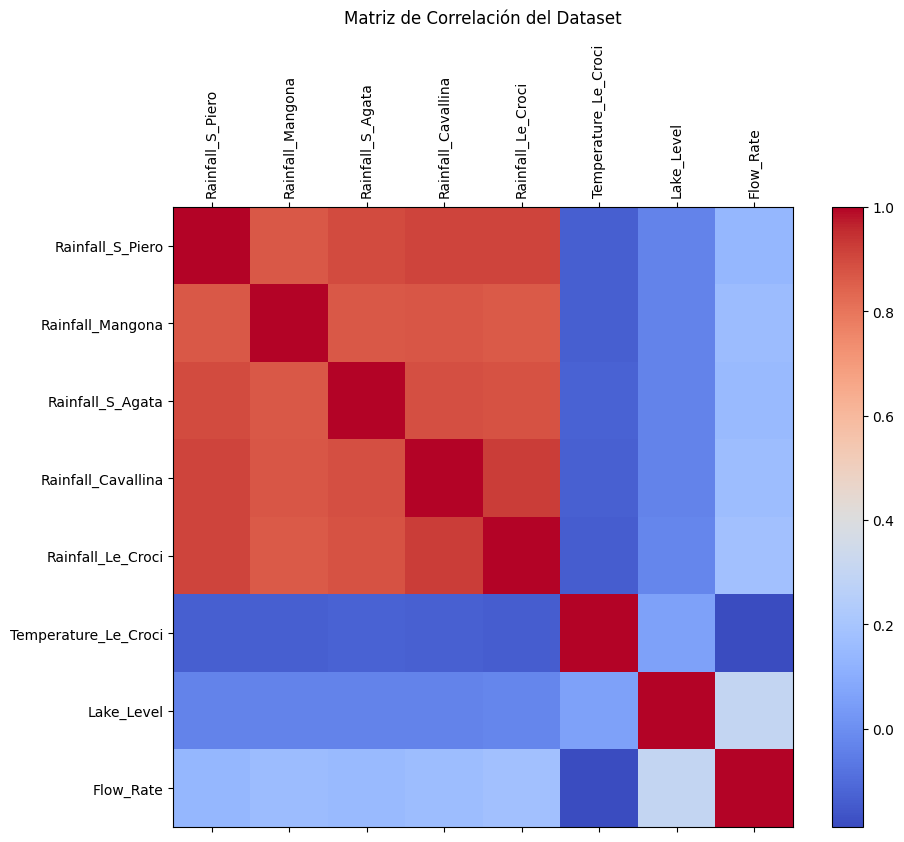

Rainfall_S_Piero       -0.032786
Rainfall_Mangona       -0.030973
Rainfall_S_Agata       -0.030968
Rainfall_Cavallina     -0.032599
Rainfall_Le_Croci      -0.023531
Temperature_Le_Croci    0.061024
Lake_Level              1.000000
Flow_Rate               0.302700
Name: Lake_Level, dtype: float64

In [25]:
import matplotlib.pyplot as plt

# tendencias estadísticas
plt.figure(figsize=(12, 6))
plt.plot(data_filled_statistical.index, data_filled_statistical['Lake_Level'], label='Lake Level')
plt.title('Tendencia del Nivel del Lago a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Nivel del Lago')
plt.legend()
plt.grid()
plt.show()

# correlación entre las variables
correlation_matrix = data_filled_statistical.corr()

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Matriz de Correlación del Dataset', pad=15)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# correlaciones específicas con el nivel del lago
correlation_matrix['Lake_Level']


In [27]:
eda_conclusions = """
Conclusiones del Análisis Exploratorio de Datos (EDA):

1. Tendencia del Nivel del Lago:
   - El nivel del lago es relativamente estable con pequeñas variaciones.
   - Esto sugiere que hay patrones predecibles.

2. Correlaciones:
   - La variable 'Flow_Rate' tiene una correlación positiva moderada (0.30) con 'Lake_Level', lo que la convierte en una característica importante para el modelo.
   - Las precipitaciones ('Rainfall') y la temperatura ('Temperature_Le_Croci') muestran correlaciones bajas, pero podrían influir en ciertos períodos.

3. Distribuciones:
   - El nivel del lago está concentrado alrededor de su media (~249.56), indicando estabilidad.
   - Las variables de flujo y precipitaciones presentan valores extremos ocasionales.


Próximos pasos:
- Entrenar un modelo de predicción para estimar el nivel del lago ('Lake_Level').
"""

# conclusiones
print(eda_conclusions)



Conclusiones del Análisis Exploratorio de Datos (EDA):

1. Tendencia del Nivel del Lago:
   - El nivel del lago es relativamente estable con pequeñas variaciones.
   - Esto sugiere que hay patrones predecibles.

2. Correlaciones:
   - La variable 'Flow_Rate' tiene una correlación positiva moderada (0.30) con 'Lake_Level', lo que la convierte en una característica importante para el modelo.
   - Las precipitaciones ('Rainfall') y la temperatura ('Temperature_Le_Croci') muestran correlaciones bajas, pero podrían influir en ciertos períodos.

3. Distribuciones:
   - El nivel del lago está concentrado alrededor de su media (~249.56), indicando estabilidad.
   - Las variables de flujo y precipitaciones presentan valores extremos ocasionales.


Próximos pasos:
- Entrenar un modelo de predicción para estimar el nivel del lago ('Lake_Level').



# Montar el modelo

Random Forest:
RMSE: 1.92, R²: -0.28

Regresión Lineal:
RMSE: 1.66, R²: 0.05


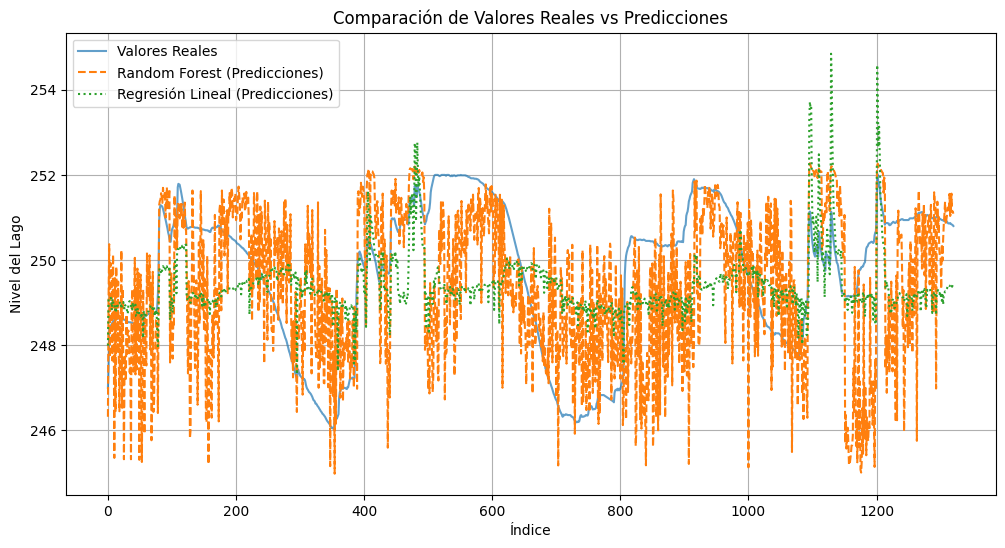

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)
X_test.to_csv('/workspace/series-temporales/data/processed/X_test.csv', index=True)
y_test.to_csv('/workspace/series-temporales/data/processed/y_test.csv', index=True)


# Modelo 1: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Modelo 2: Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluación del modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluación del modelo Regresión Lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Imprimir resultados
print("Random Forest:")
print(f"RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")
print("\nRegresión Lineal:")
print(f"RMSE: {rmse_linear:.2f}, R²: {r2_linear:.2f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Valores Reales', alpha=0.7)
plt.plot(y_pred_rf, label='Random Forest (Predicciones)', linestyle='--')
plt.plot(y_pred_linear, label='Regresión Lineal (Predicciones)', linestyle=':')
plt.legend()
plt.title('Comparación de Valores Reales vs Predicciones')
plt.xlabel('Índice')
plt.ylabel('Nivel del Lago')
plt.grid()
plt.show()


# Los modelos no predicen al nivel de calidad deseado

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

#  gradient boosting nuevo modelo
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbr_model.fit(X_train, y_train)

# predicciones
y_pred_gbr = gbr_model.predict(X_test)

# evaluar modelo
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

rmse_gbr, r2_gbr


(1.6701017786956427, 0.03494444418500131)

In [41]:
from sklearn.model_selection import GridSearchCV

# Definir hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Configurar la búsqueda
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones
y_pred_optimized = best_model.predict(X_test)

# Evaluar el mejor modelo
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

best_params, rmse_optimized, r2_optimized


Fitting 3 folds for each of 27 candidates, totalling 81 fits


({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200},
 1.5887414136097775,
 0.1266810760095407)